In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [5]:
data = pd.read_csv('Google_train_data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Google_train_data.csv'

In [ ]:
data.info()

In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 16s - loss: 0.0320 - 16s/epoch - 459ms/step
Epoch 2/20
35/35 - 12s - loss: 0.0141 - 12s/epoch - 335ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0093 - 9s/epoch - 244ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0091 - 7s/epoch - 214ms/step
Epoch 5/20
35/35 - 10s - loss: 0.0073 - 10s/epoch - 285ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0088 - 9s/epoch - 250ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0066 - 7s/epoch - 212ms/step
Epoch 8/20
35/35 - 9s - loss: 0.0068 - 9s/epoch - 243ms/step
Epoch 9/20
35/35 - 9s - loss: 0.0068 - 9s/epoch - 253ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0069 - 7s/epoch - 213ms/step
Epoch 11/20
35/35 - 9s - loss: 0.0060 - 9s/epoch - 247ms/step
Epoch 12/20
35/35 - 10s - loss: 0.0057 - 10s/epoch - 284ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 214ms/step
Epoch 14/20
35/35 - 9s - loss: 0.0065 - 9s/epoch - 252ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0057 - 8s/epoch - 242ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0061 - 7s/epoch - 210ms/step
Epoch 17/

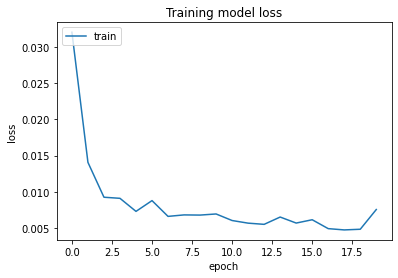

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 72ms/step


array([[1.16179  ],
       [1.1631088],
       [1.1724331],
       [1.1868168],
       [1.1983689],
       [1.1982452],
       [1.1870549],
       [1.1716752],
       [1.1618347],
       [1.1591649],
       [1.1531832],
       [1.1432477],
       [1.1342392],
       [1.1257831],
       [1.1235965],
       [1.127025 ],
       [1.142286 ],
       [1.1664964],
       [1.1942145],
       [1.2218447],
       [1.2332776],
       [1.2312684],
       [1.2147205],
       [1.1905136],
       [1.1684806],
       [1.1558316],
       [1.1526709],
       [1.1519624],
       [1.1453004],
       [1.1353829],
       [1.1244267],
       [1.1120113],
       [1.0936927],
       [1.071203 ],
       [1.0618066],
       [1.0695277],
       [1.0879493],
       [1.1089689],
       [1.1289511],
       [1.1389962],
       [1.1495905],
       [1.1627021],
       [1.1780866],
       [1.1925853],
       [1.2027087],
       [1.2047343],
       [1.1971886],
       [1.1904229],
       [1.1890376],
       [1.1945436],


In [14]:
predicted_price = sc.inverse_transform(y_pred)

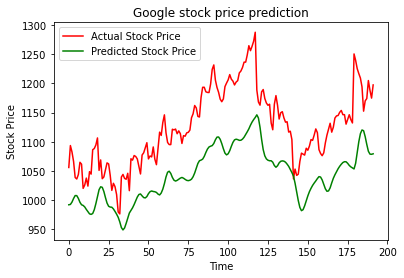

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()